# Data visualizatie

Matplotlib is een python bibliotheek die ontworpen werd door John Hunter (2003) met als doel om de MATLAB plot-stijl binnen IPython binnen te brengen. Recent winnen pakketten (ggplot, holoviews,seaborn,...) die een modernere API  aanbieden meer en meer aan populariteit. We zullen ons hier beperken tot 1 wrapper: seaborn.
We starten echter met de basis Matplotlib.

## Matplotlib: een introductie

In deze cursus zulllen we werken met de pyplot interface. Er zijn ook 2 mogelijkheden om met een notebook matplotlib te gebruiken. 

%matplotlib notebook (geeft een interactieve plot weer die in de notebook worden ingebed)
%matplotlib inline   (geeft statische beelden of de plots die worden ingebed in de notebook)

We zullen vooral de laatste optie gebruiken.

De data zijn afkomstig van de kaggle website. We gebruiken hiervoor de ontbijtgranen dataset, 1 dataset met de uitstoot van broeikastgassen en een andere met de temperatuur.

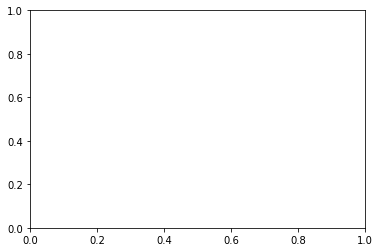

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# maakt een  Figuur en een  Ax plt.subplots
fig, ax = plt.subplots() #als we niks tussen de haakjes plaatsen tonen we alles op 1 plot

# We tonen het resultaat
plt.show()

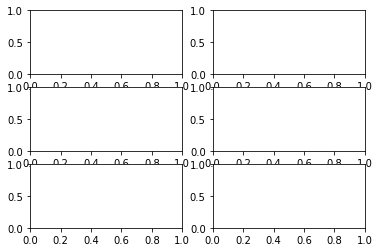

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
# maakt een  Figuur en een  Ax plt.subplots
fig, ax = plt.subplots(3,2) #hier worden nu eigenlijk 6 plots gemaakt 3 rijen van 2 plots elk

# We tonen het resultaat
plt.show()

We willen weten hoe de ontbijtgranen in het algemeen worden beoordeeld. Bijvoorbeel hoeveel producten krijgen een beoordeling van meer dan 50%. Een histogram kan ons hier bij helpen. 

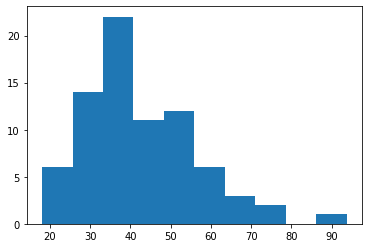

In [83]:
import pandas as pd
ontbijtgranen=pd.read_csv('/Users/ronybaekeland/Desktop/datascience/datasets/cereal.csv')
ontbijtgranen.rename(columns={'name':'naam','mfr':'fabrikant','calories':'caloriën','protein':'eiwitten','fat':'vetten',
                        'sodium':'natrium','fiber':'vezels','carbo':'koolhydraten','sugars':'suikers',
                        'potass':'kalium','vitamins':'vitamine&mineralen',
                        'shelf':'schap','weight':'gewicht','cups':'scheppen','rating':'beoordeling'},inplace=True)
import matplotlib.pyplot as plt # we importeren de library standaard als plt

fig,ax= plt.subplots()
ax.hist(ontbijtgranen['beoordeling'])
plt.show()

Standaard worden er steeds 10 kolommen weerggeven bij ene histogram. We noemen deze kolommen bins. We kunnen het aantal bins gemakkelijk wijzigen. Ook is het aangeraden de x-as en de y-as labels mee te geven. Dit doen we met de set_xlabel e, set_ylabel methode. Tenslotte kunnen we de algemene grafiek ook een titel meegeven. Bijvoorbeeld:

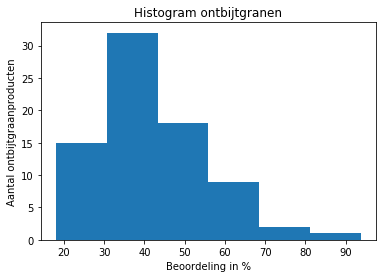

In [54]:
import matplotlib.pyplot as plt # we importeren de library standaard als plt
fig,ax= plt.subplots()
ax.hist(ontbijtgranen['beoordeling'],bins=6)
# ontbijtgranen['beoordeling'].hist(bins=6) #dit is een alternatieve manier; Merk op dat er nu een rooster is toegevoegd
ax.set_xlabel('Beoordeling in %') #we zien dit onder de x-as verschijnen
ax.set_ylabel('Aantal ontbijtgraanproducten')#we zien dit onder de x-as verschijnen
ax.set_title('Histogram ontbijtgranen')#dit komt bovenaan de grafiek
plt.show()

I.p.v steeds een subplot te definieren kan men ook rechtstreeks plotten. Bijvoorbeeld:

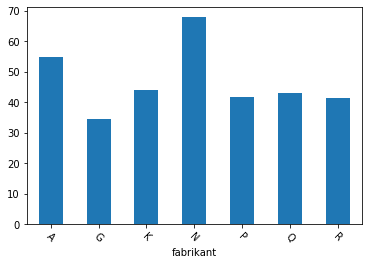

In [85]:
import matplotlib.pyplot as plt # we importeren de library standaard als plt
granenperproducent=ontbijtgranen.groupby('fabrikant')['beoordeling'].mean()
granenperproducent.plot(kind='bar',rot=-45) #we gebruiken de bar-chart en plot
plt.show()

Maar m.b.v. de subplots houden we een beter overzicht.

fabrikant
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Name: beoordeling, dtype: float64


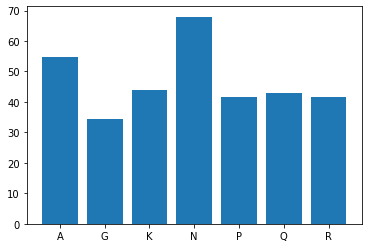

In [91]:
import matplotlib.pyplot as plt # we importeren de library standaard als plt
granenperproducent=pd.DataFrame(ontbijtgranen.groupby('fabrikant')['beoordeling'].mean())
print(granenperproducent['beoordeling'].head())
fig,ax= plt.subplots()
ax.bar(granenperproducent.index,granenperproducent['beoordeling'])
plt.show()

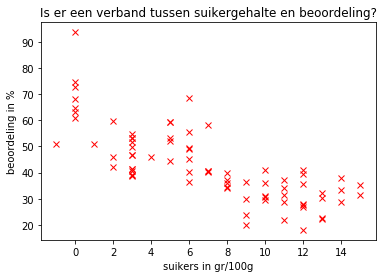

In [94]:
import matplotlib.pyplot as plt # we importeren de library standaard als plt
fig,ax= plt.subplots()
ax.plot(ontbijtgranen['suikers'],ontbijtgranen['beoordeling'],marker='x',linestyle='None',color='red')
#we gebruiken de bar-chart en plot met marker x en we zetten de marker in het rood er is geen lijn tussen de punten
ax.set_xlabel("suikers in gr/100g")
ax.set_ylabel("beoordeling in %")
ax.set_title("Is er een verband tussen suikergehalte en beoordeling?")
plt.show()

In [96]:
# Tenslotte willen we graag de figuur opslaan. Dit kan op in vele 
#verschillende formats (png, jpeg,jpg,png,....,svg,...tiff)
#we refereren naar fig voor de figuur en gebruiken dan savefig
fig.savefig("/Users/ronybaekeland/Desktop/datascience/datasets/VerbandTussenSuikerEnBeoordeling.jpg")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 4 columns):
dt                        3192 non-null object
LandAverageTemperature    3180 non-null float64
LandMaxTemperature        1992 n

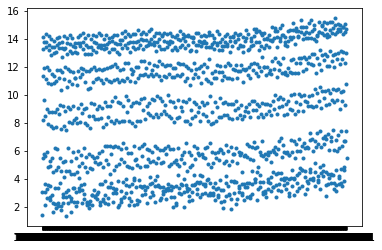

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
# maakt een  Figuur en een  Ax plt.subplots
broeikastgassen=pd.read_csv('/Users/ronybaekeland/Desktop/datascience/datasets/greenhouse_gas_inventory_data_data.csv')
# we beperken ons tot Belgie
BroeikastgassenBelgie=broeikastgassen[broeikastgassen['country_or_area']=='Belgium']
#print(broeikastgassen.columns)
GlobaleTemperatuur=pd.read_csv('/Users/ronybaekeland/Desktop/datascience/datasets/GlobalTemperatures.csv')
print(GlobaleTemperatuur.info())
# we beperken ons nu tot de gemiddelde landtemperatuur, minimum landtemperatuur en maxtemperatuur van af 1900
GTLandGMinMAx=GlobaleTemperatuur[['dt','LandAverageTemperature','LandMaxTemperature','LandMinTemperature']]
print(GTLandGMinMAx.info())   
print(GTLandGMinMAx.head()) 
GTLandGMinMAx=GTLandGMinMAx[GTLandGMinMAx['dt']>='1900-01-01']
print(GTLandGMinMAx.head())
fig, ax = plt.subplots() #als we niks tussen de haakjes plaatsen tonen we alles op 1 plot
ax.scatter(x=GTLandGMinMAx['dt'],y=GTLandGMinMAx['LandAverageTemperature'],marker='.')
# We tonen het resultaat
plt.show()